### *Задание 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config inlinebackend.figure_format = 'svg'

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).

Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
Credit Card Fraud Detection

Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
creditcards = pd.read_csv('creditcard.csv')

In [7]:
creditcards.shape

(284807, 31)

In [8]:
creditcards.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
creditcards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб.

In [18]:
creditcards_value_counts = creditcards.groupby('Class').agg(
    value_counts = pd.NamedAgg('Class', 'value_counts'))

creditcards_value_counts.reset_index(drop = True)

,value_counts
0,284315
1,492


<AxesSubplot:xlabel='Class,Class'>

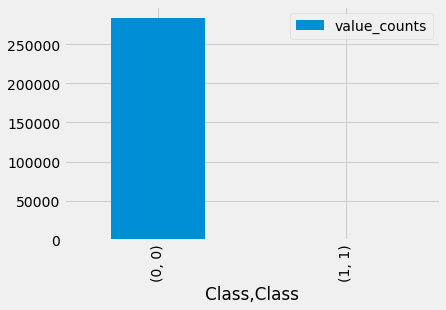

In [20]:
creditcards_value_counts.plot(kind = 'bar')

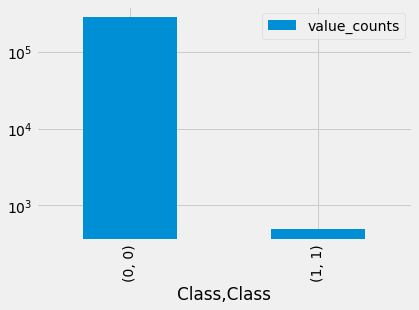

In [22]:
creditcards_value_counts.plot(kind = 'bar')
plt.yscale(value = 'log')

На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “V1”.

In [36]:
class_0 = creditcards['V1'].loc[creditcards['Class'] == 0]
class_1 = creditcards['V1'].loc[creditcards['Class'] == 1]

Text(0.5, 0, 'V1')

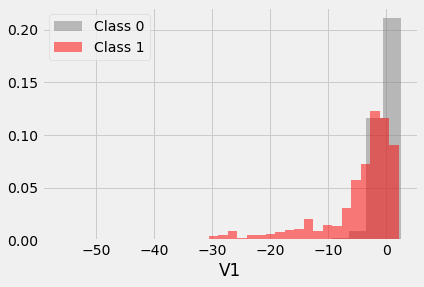

In [63]:
plt.hist(class_0, bins = 20, alpha = 0.5, density = True, color = 'grey', label = 'Class 0')
plt.hist(class_1, bins = 20, alpha = 0.5, density = True, color = 'red', label = 'Class 1')

legend = plt.legend(loc = 'upper left')
# plt.setp(legend.get_texts())

plt.xlabel('V1')